In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# In a condition we cannot get hold of a NaN value 
print(np.nan == np.nan)

#But we can hold None just like strings ["missing”, “not available”, “NA”]
print(None == None)

False
True


In [20]:
# creating lists
list_with_all_missing = [None, None, np.nan, np.nan]
list_with_2_missing   = [1, np.nan, 2, np.nan]

# creating series using above lists
series_with_all_missing = pd.Series(list_with_all_missing)
series_with_2_missing   = pd.Series(list_with_2_missing)

In [21]:
series_with_all_missing + series_with_2_missing

0   NaN
1   NaN
2   NaN
3   NaN
dtype: float64

In [22]:
series_with_all_missing / series_with_2_missing

0   NaN
1   NaN
2   NaN
3   NaN
dtype: float64

In [23]:
# Conflicting outputs
print(sum(series_with_all_missing))
print(series_with_all_missing.sum())

nan
0.0


In [24]:
# Conflicting outputs
print(sum(series_with_2_missing))
print(series_with_2_missing.sum())

nan
3.0


In [25]:
df = pd.DataFrame(data=[[1, 2, np.nan, 3],
                        [np.nan, np.nan, np.nan, np.nan],
                        [4, 5,'NA', '#$%'],
                        [6, 7, np.nan, 8],
                        ["missing", 9, np.nan, 10],
                        [11, 12, np.nan, "not available"]], 
                  index='i0,i1,i2,i3,i4,i5'.split(','), 
                  columns='c0,c1,c2,c3'.split(','))

df

,c0,c1,c2,c3
i0,1,2.0,NaN,3
i1,NaN,NaN,NaN,NaN
i2,4,5.0,NA,#$%
i3,6,7.0,NaN,8
i4,missing,9.0,NaN,10
i5,11,12.0,NaN,not available


In [26]:
df['c3'].isnull()

i0    False
i1     True
i2    False
i3    False
i4    False
i5    False
Name: c3, dtype: bool

In [27]:
df.to_csv('Df_with_NaNs', index=False)

Index(['c0', 'c1', 'c2', 'c3'], dtype='object')

In [57]:
new_df = pd.read_csv('Df_with_NaNs', na_values= ['missing', 'not available', 'NA'])
# we should avoid adding the '#$%' value here as a value might be inappropriate
# in one column but not in another.
# eg: 'Male' entered as a value in Age column instead of Gender. 

# Setting new index with the same name
new_df['index'] = 'i0,i1,i2,i3,i4,i5'.split(',')
new_df.set_index('index', inplace=True)

#DataFrame is ready !
new_df

,c0,c1,c2,c3
index,,,,
i0,1.0,2.0,NaN,3
i1,NaN,NaN,NaN,NaN
i2,4.0,5.0,NaN,#$%
i3,6.0,7.0,NaN,8
i4,NaN,9.0,NaN,10
i5,11.0,12.0,NaN,NaN


In [58]:
new_df.dropna()
# Oops!

,c0,c1,c2,c3
index,,,,


In [59]:
print('Data types:\n', new_df.dtypes)

# (Although such an assignment is not correct, but the purpose here is to
# demonstrate use of mean/median/mode academically so let's continue with it)
new_df.loc['i2', 'c3'] = 10

new_df['c3'] = new_df['c3'].astype('float64') # if skipped a warning would be thrown 
                                              # as '#$%' was a string.
    
print('\n Data types(after):\n', new_df.dtypes)

Data types:
 c0    float64
c1    float64
c2    float64
c3     object
dtype: object

 Data types(after):
 c0    float64
c1    float64
c2    float64
c3    float64
dtype: object


In [61]:
mean_c0 = new_df['c0'].mean() # returns a single float
median_c1 = new_df['c1'].median()  # returns a single float
mode_c3 = new_df['c3'].mode()  # returns a series

print('mean_c0 = ', mean_c0)
print('median_c1 = ', median_c1)
print('mode_c3[0] = ', mode_c3[0]) # 0th element: the most repeated term

mean_c0 =  5.5
median_c1 =  7.0
mode_c3[0] =  10.0


In [62]:
# Usually .fillna() method is used to replace NaNs
new_df['c0'].fillna(mean_c0, inplace=True)

# We can do the same by .replace() method
new_df['c1'].replace(to_replace= np.nan, value= median_c1, inplace=True)

# Also by vectorised indexing
null_indexes_in_c3 = new_df.index[new_df['c3'].isnull()]
new_df.loc[null_indexes_in_c3, 'c3'] = mode_c3[0]

new_df

,c0,c1,c2,c3
index,,,,
i0,1.0,2.0,NaN,3.0
i1,5.5,7.0,NaN,10.0
i2,4.0,5.0,NaN,10.0
i3,6.0,7.0,NaN,8.0
i4,5.5,9.0,NaN,10.0
i5,11.0,12.0,NaN,10.0


In [63]:
new_df.drop(columns=['c2'], inplace=True)

new_df

,c0,c1,c3
index,,,
i0,1.0,2.0,3.0
i1,5.5,7.0,10.0
i2,4.0,5.0,10.0
i3,6.0,7.0,8.0
i4,5.5,9.0,10.0
i5,11.0,12.0,10.0


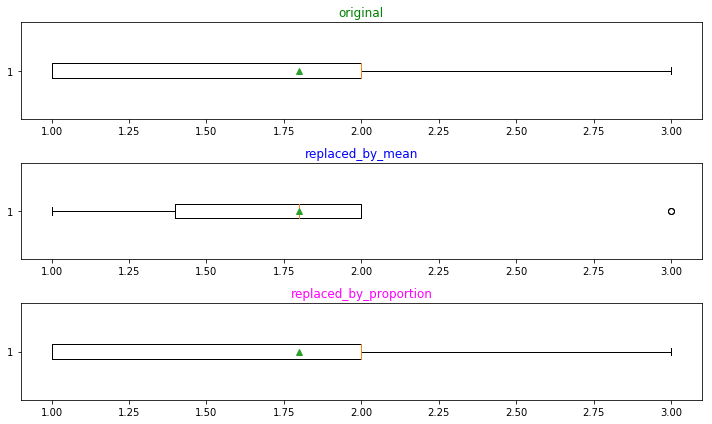

In [24]:
original               = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3]
replaced_by_mean       = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3,  1.8, 1.8, 1.8, 1.8, 1.8]
replaced_by_proportion = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3,  1, 1, 2, 2, 3]

plt.figure(figsize=(10,6))
plt.subplot(3, 1, 1)
plt.boxplot(original, showmeans=True, vert=False)
plt.title('original', color='green')
plt.subplot(3, 1, 2)
plt.boxplot(replaced_by_mean, showmeans=True, vert=False)
plt.title('replaced_by_mean', color='blue')
plt.subplot(3, 1, 3)
plt.boxplot(replaced_by_proportion, showmeans=True, vert=False)
plt.title('replaced_by_proportion', color='magenta')
plt.tight_layout()
plt.show()

In [23]:
print(sum(original)/len(original))
print(sum(replaced_by_mean)/len(replaced_by_mean))
print(sum(replaced_by_proportion)/len(replaced_by_proportion))

1.8
1.8000000000000003
1.8


In [21]:
# "valueCounts" and "nanCounts" are both dictionaries containing a pd.Series with 
# keys as column names. They are initialized as follows:
# 
# for column_Name in df.columns.values:
#  {
#   valueCounts = {key: column_Name, value: df['column_Name'].value_counts()}
#   nanCounts   = {key: column_Name, value: df['column_Name'].isnull().sum()}
#  }

# IMPLEMENTATION: Assume name of a column is "XYZ"
proportion = get_proportion('XYZ') #say we have values like [1.99, 3.01, 1]
print(proportion)
# Since indices are always integers, manual approximation to nearest integer is required
# as the list "proportion" will  contain decimal values. (We can write a function too) 
proportion = [2, 3, 1] # sum(proportion) = nanCounts['XYZ'] = 6
fill_NaNs(proportion, 'XYZ')


def get_proportion(col):
    return(np.array(valueCounts[col].values) / valueCounts[col].sum() * nanCounts[col])

def fill_NaNs(proportion, col):
    # Get the list of all indexes with missing values, say[89,5,8,64,32,17]
    nan_indexes = df[df[col].isnull()].index.tolist() 
    # len(nanCounts['XYZ']) = len(nan_indexes) = sum(proportion) = 6
        
    for x in range(len(proportion)):
        # assume [64,17] are randomly picked in first iteration, because proportion[0]=2
        random_subset = random.sample(population = nan_indexes, k = proportion[x])
                
        # assigning values to [64, 17] for column 'XYZ'
        df.loc[random_subset, col] = valueCounts[col].keys()[x]
                
        # updating the indexes list by removing [64, 17]. Now only [89,5,8,32] remain
        nan_indexes = list(set(nan_indexes) - set(random_subset))

35